In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
data=pd.read_csv('scanner_data.csv')
data


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...,...
131701,131702,04/07/2016,20203,32900,IEV,FO112,3.0,6.46
131702,131703,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50
131703,131704,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19
131704,131705,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57


In [9]:
data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0          int64
Date               object
Customer_ID         int64
Transaction_ID      int64
SKU_Category       object
SKU                object
Quantity          float64
Sales_Amount      float64
dtype: object

In [10]:
data.describe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method NDFrame.describe of         Unnamed: 0        Date  Customer_ID  Transaction_ID SKU_Category  \
0                1  02/01/2016         2547               1          X52   
1                2  02/01/2016          822               2          2ML   
2                3  02/01/2016         3686               3          0H2   
3                4  02/01/2016         3719               4          0H2   
4                5  02/01/2016         9200               5          0H2   
...            ...         ...          ...             ...          ...   
131701      131702  04/07/2016        20203           32900          IEV   
131702      131703  04/07/2016        20203           32900          N8U   
131703      131704  04/07/2016        20203           32900          U5F   
131704      131705  04/07/2016        20203           32900          0H2   
131705      131706  04/07/2016        20203           32900          Q4N   

          SKU  Quantity  Sales_Amount  
0       0EM7L

In [11]:
data = data.drop(['Unnamed: 0'], axis=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
non_numeric_description = data.describe(include=[object])
non_numeric_description

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,SKU_Category,SKU
count,131706,131706,131706
unique,363,187,5242
top,23/09/2016,N8U,UNJKW
freq,638,10913,2007


In [13]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
data.set_index('Date', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
daily_sales = data['Sales_Amount'].resample('D').sum()
weekly_sales = data['Sales_Amount'].resample('W').sum()
monthly_sales = data['Sales_Amount'].resample('M').sum()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
daily_sales.head(), weekly_sales.head(), monthly_sales.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(Date
 2016-01-02    1929.55
 2016-01-03     798.15
 2016-01-04    3273.27
 2016-01-05    4919.03
 2016-01-06    1559.72
 Freq: D, Name: Sales_Amount, dtype: float64,
 Date
 2016-01-03     2727.70
 2016-01-10    22381.65
 2016-01-17    32452.63
 2016-01-24    27594.49
 2016-01-31    26043.81
 Freq: W-SUN, Name: Sales_Amount, dtype: float64,
 Date
 2016-01-31    111200.28
 2016-02-29    122114.61
 2016-03-31    127924.54
 2016-04-30    138172.11
 2016-05-31    142719.86
 Freq: M, Name: Sales_Amount, dtype: float64)

In [17]:
sns.set_style('whitegrid')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


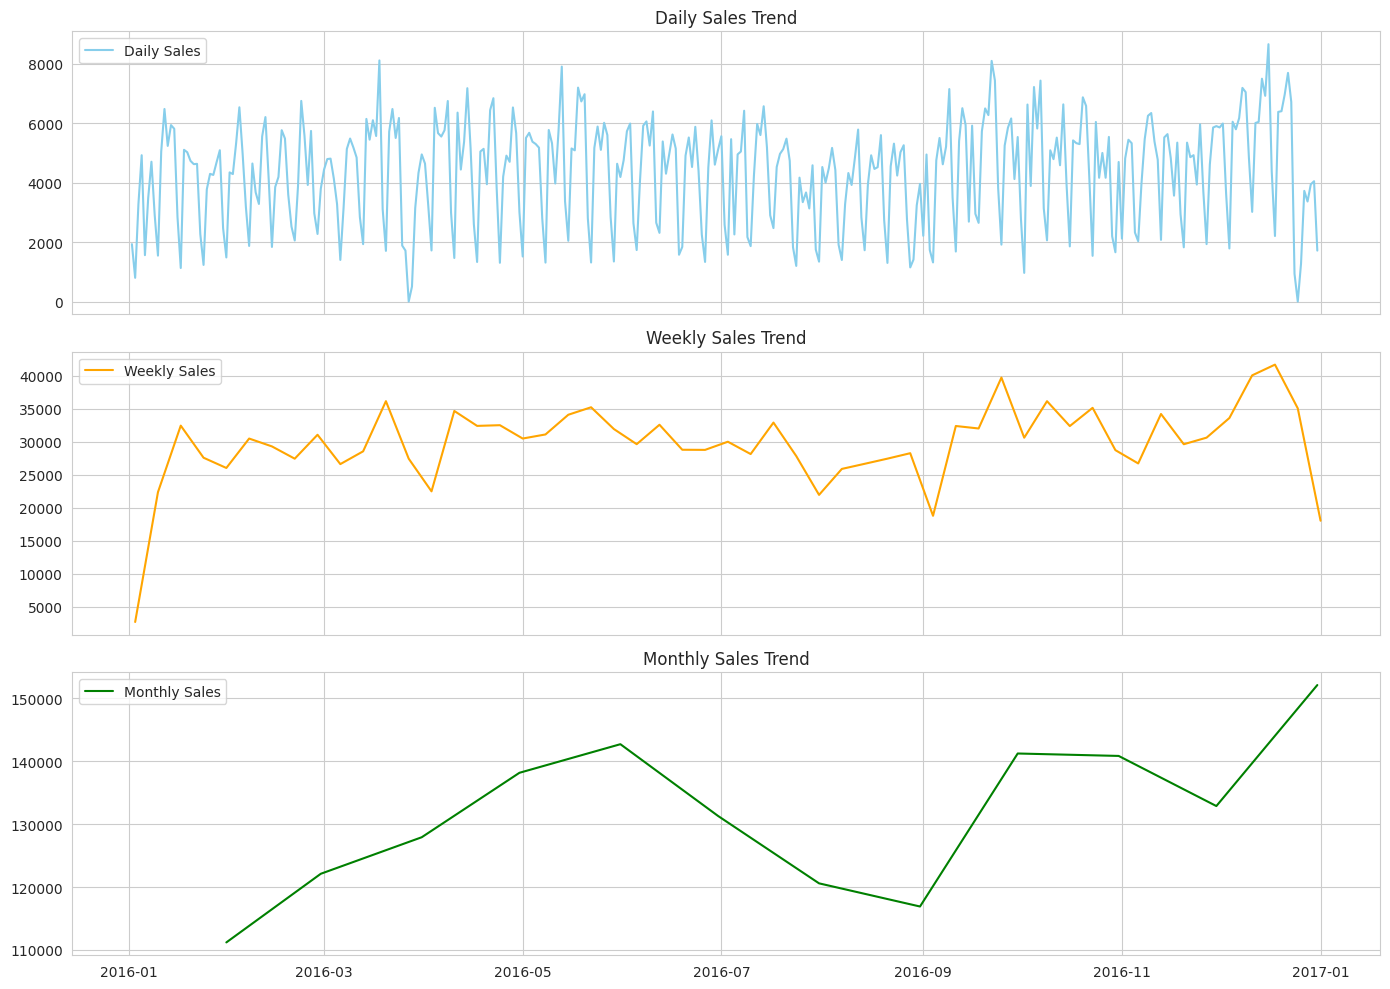

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
# Plot daily sales
axes[0].plot(daily_sales, color='skyblue', label='Daily Sales')
axes[0].set_title('Daily Sales Trend')
axes[0].legend()
# Plot weekly sales
axes[1].plot(weekly_sales, color='orange', label='Weekly Sales')
axes[1].set_title('Weekly Sales Trend')
axes[1].legend()
# Plot monthly sales
axes[2].plot(monthly_sales, color='green', label='Monthly Sales')
axes[2].set_title('Monthly Sales Trend')
axes[2].legend()
# Set a tight layout and show the plots
plt.tight_layout()
plt.show()


In [19]:
data['DayOfWeek'] = data.index.day_name()
data['Month'] = data.index.month_name()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
heatmap_data = data.pivot_table(values='Sales_Amount',
index='DayOfWeek',
columns='Month',
aggfunc='mean')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
sorted_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(sorted_days)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
import calendar
sorted_months = list(calendar.month_name)[1:]
heatmap_data = heatmap_data[sorted_months]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


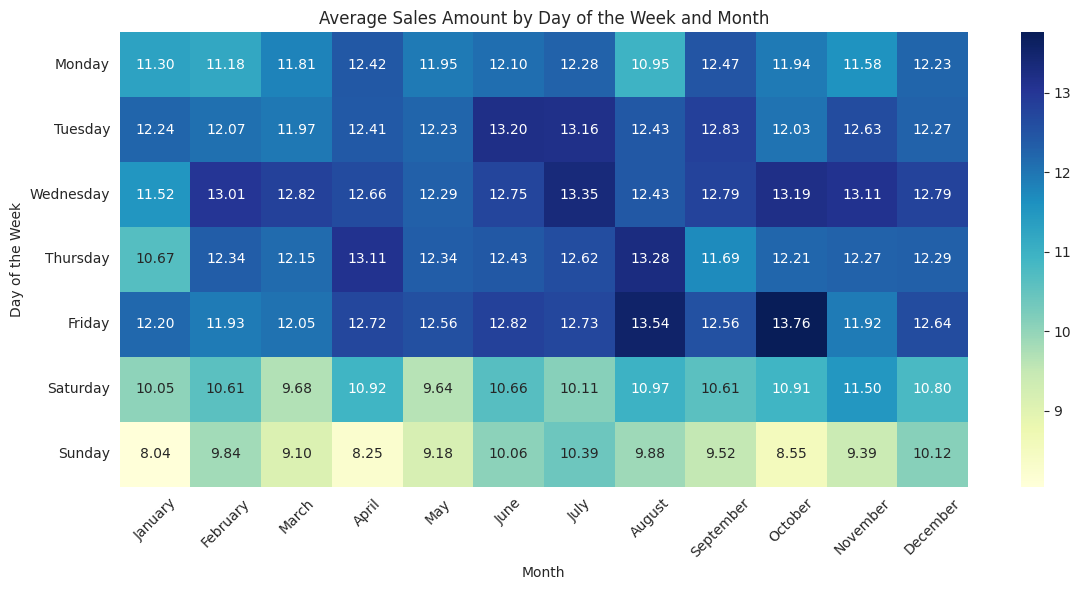

In [23]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f")
# Title and labels
plt.title('Average Sales Amount by Day of the Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of the Week')
# Adjust the aspect ratio for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


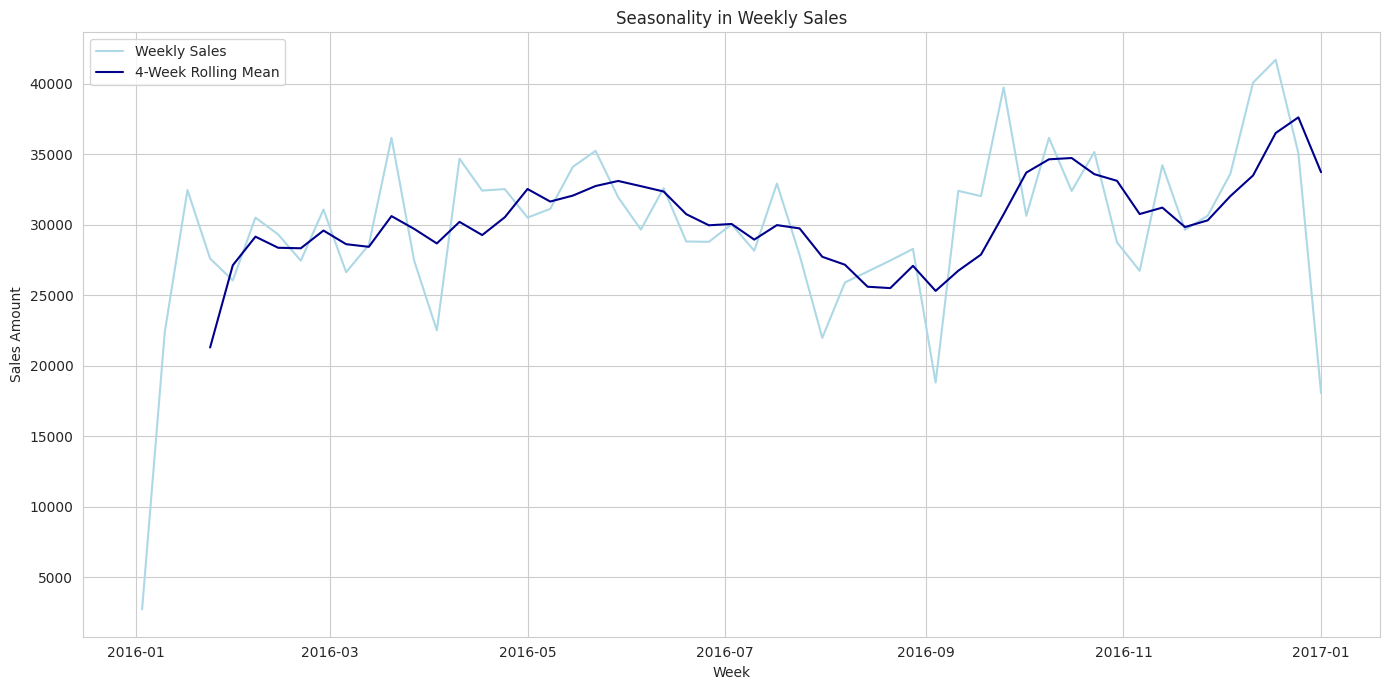

In [24]:
# We'll use the earlier calculated weekly sales data
rolling_mean = weekly_sales.rolling(window=4).mean() # 4-week rolling mean
plt.figure(figsize=(14, 7))
plt.plot(weekly_sales, color='lightblue', label='Weekly Sales')
plt.plot(rolling_mean, color='darkblue', label='4-Week Rolling Mean')

# Title and labels
plt.title('Seasonality in Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Sales Amount')
plt.legend()
# Show the plot
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


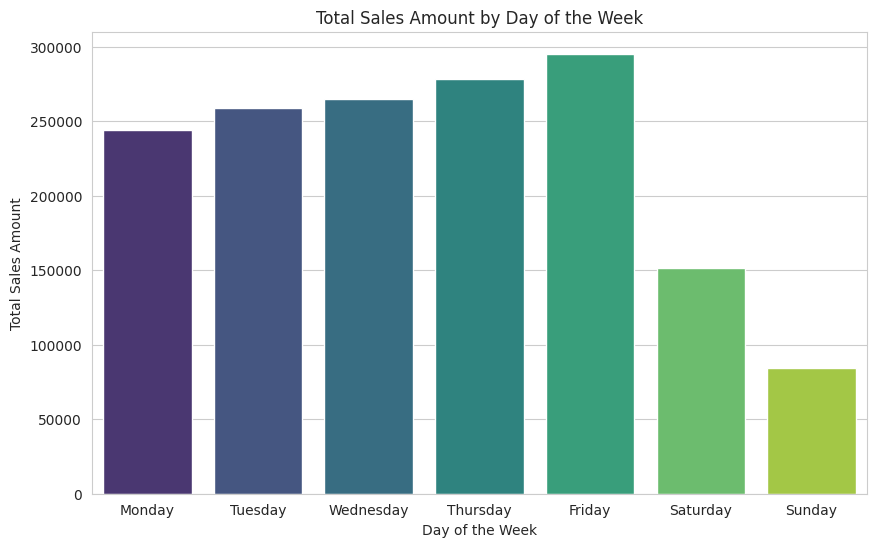

In [26]:
# Grouping the data by day of the week
day_of_week_sales = data.groupby('DayOfWeek')['Sales_Amount'].sum()
# Sorting the days of the week in the correct order
sorted_day_of_week_sales = day_of_week_sales.reindex(sorted_days)
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_day_of_week_sales.index, y=sorted_day_of_week_sales.values, palette='viridis')
# Title and labels
plt.title('Total Sales Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Amount')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


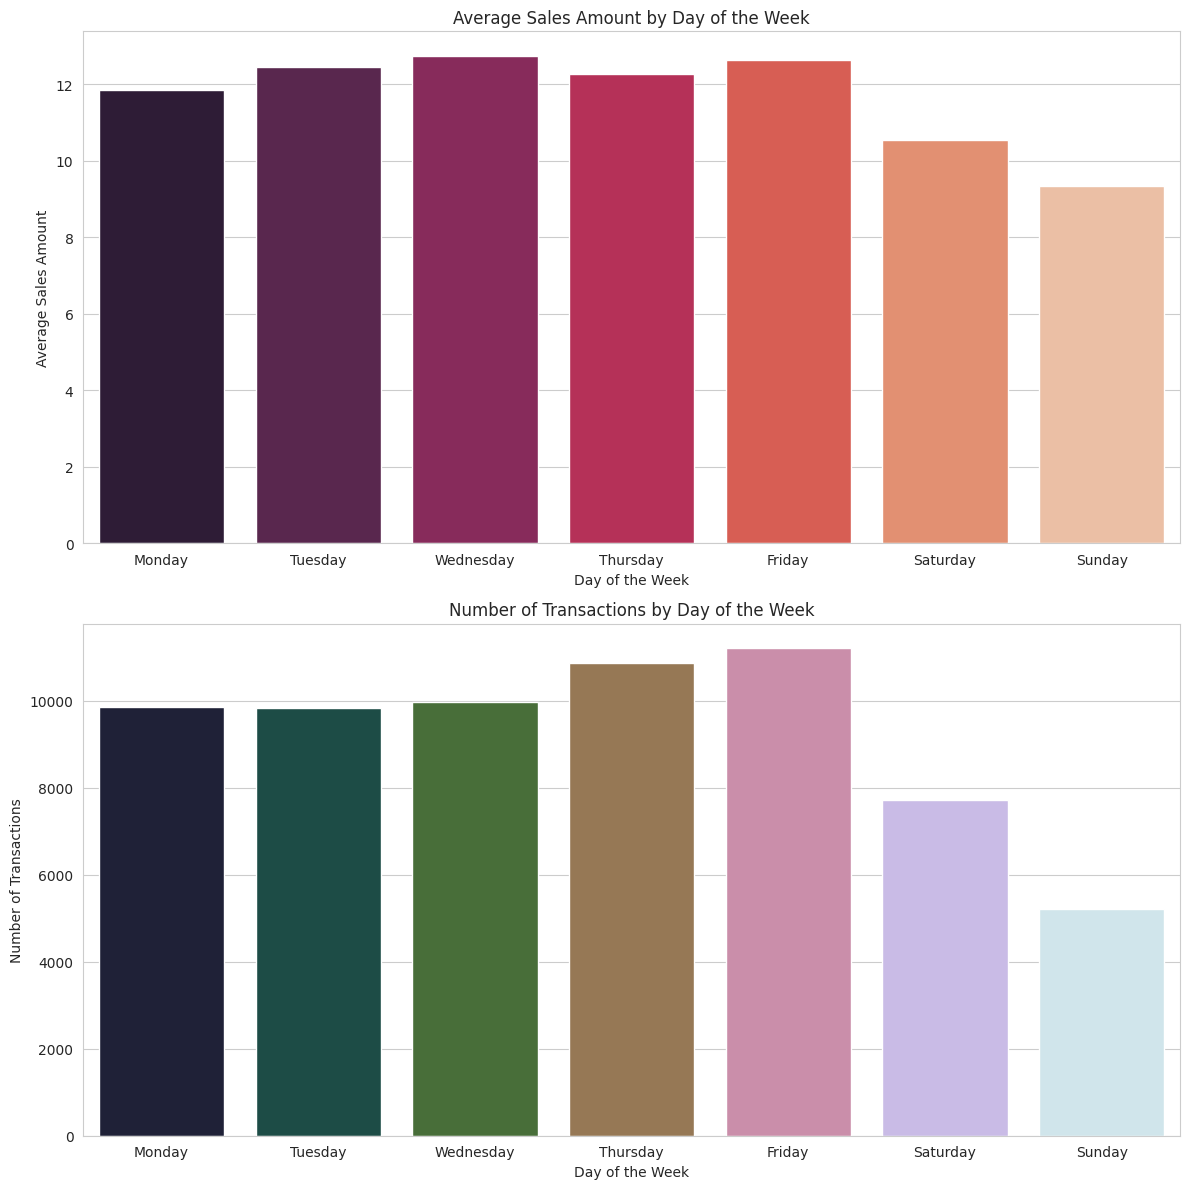

In [27]:
# Calculating the average sales per day of the week
average_sales_day_of_week = data.groupby('DayOfWeek')['Sales_Amount'].mean()
# Calculating the number of transactions per day of the week
transactions_day_of_week = data.groupby('DayOfWeek')['Transaction_ID'].nunique()
# Sorting these values in the order of days of the week
sorted_average_sales = average_sales_day_of_week.reindex(sorted_days)
sorted_transactions = transactions_day_of_week.reindex(sorted_days)
# Creating a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
# Plotting average sales per day of the week
sns.barplot(x=sorted_average_sales.index, y=sorted_average_sales.values,palette="rocket", ax=ax[0])
ax[0].set_title('Average Sales Amount by Day of the Week')
ax[0].set_xlabel('Day of the Week')
ax[0].set_ylabel('Average Sales Amount')
# Plotting number of transactions per day of the week
sns.barplot(x=sorted_transactions.index, y=sorted_transactions.values,palette="cubehelix", ax=ax[1])
ax[1].set_title('Number of Transactions by Day of the Week')
ax[1].set_xlabel('Day of the Week')
ax[1].set_ylabel('Number of Transactions')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


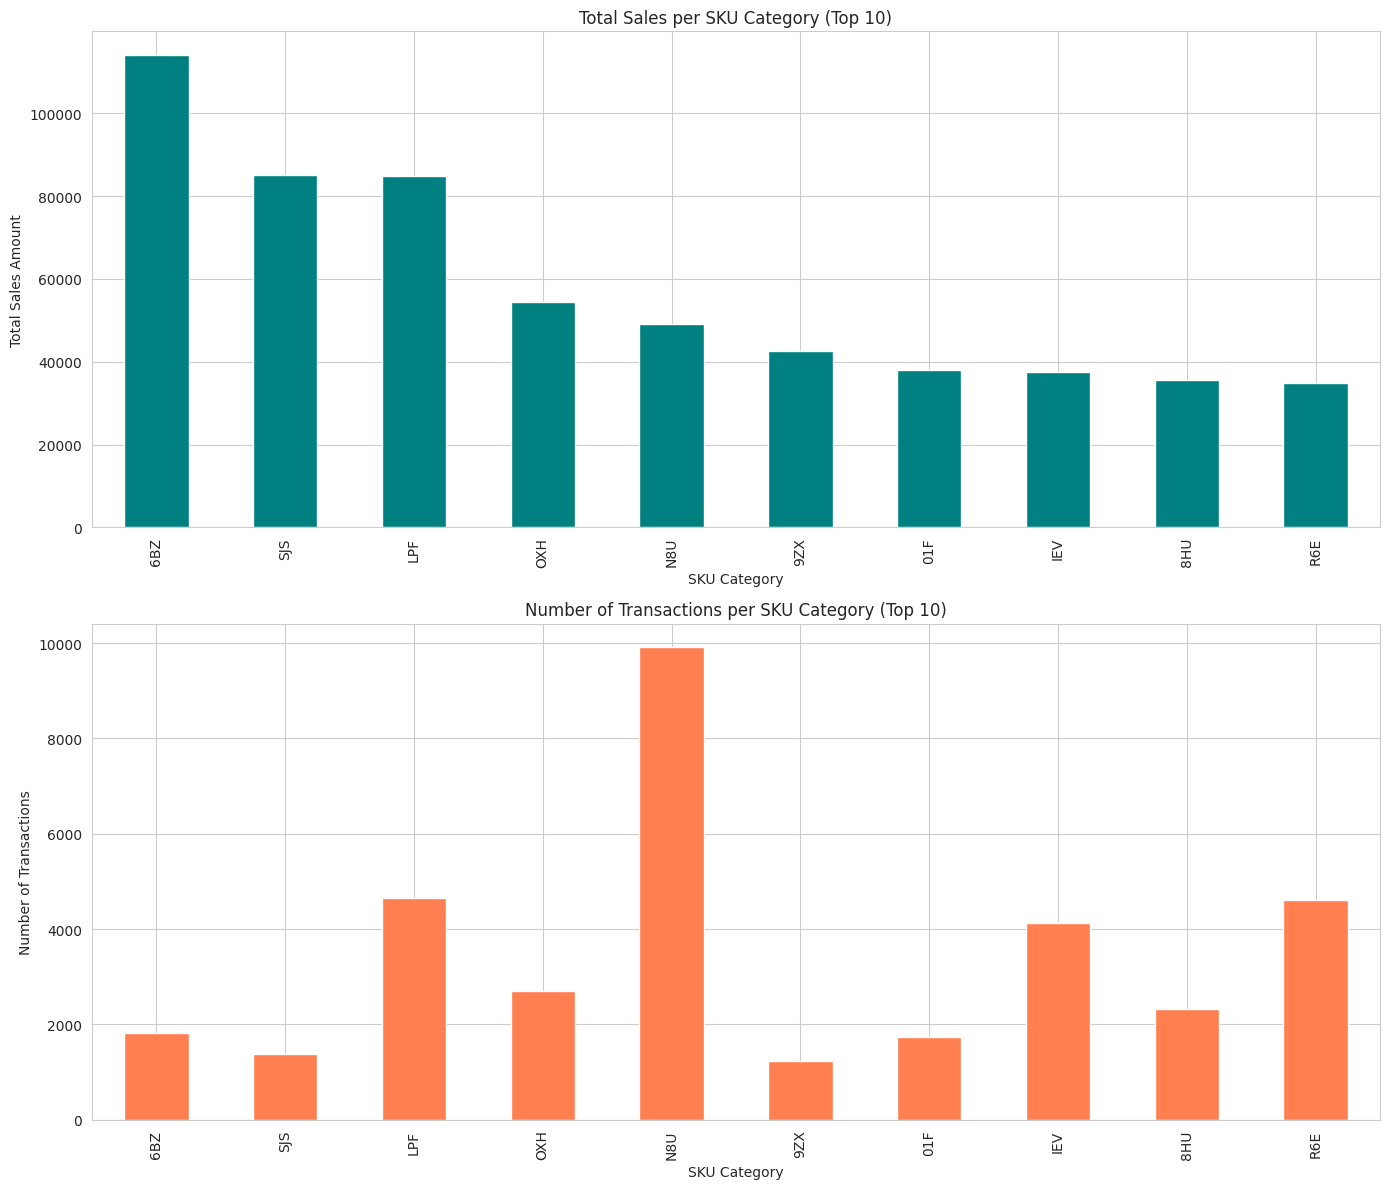

In [28]:
# Calculating total sales per SKU category
total_sales_per_category = data.groupby('SKU_Category')['Sales_Amount'].sum()

# Calculating the number of transactions per SKU category
transactions_per_category = data.groupby('SKU_Category')['Transaction_ID'].nunique()

# Sorting these by the total sales
sorted_sales_per_category = total_sales_per_category.sort_values(ascending=False)
sorted_transactions_per_category = transactions_per_category.loc[sorted_sales_per_category.index]

# Creating a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Plotting total sales per SKU category
sorted_sales_per_category.head(10).plot(kind='bar', color='teal', ax=ax[0])  # Top 10 categories
ax[0].set_title('Total Sales per SKU Category (Top 10)')
ax[0].set_xlabel('SKU Category')
ax[0].set_ylabel('Total Sales Amount')

# Plotting number of transactions per SKU category
sorted_transactions_per_category.head(10).plot(kind='bar', color='coral', ax=ax[1])  # Top 10 categories
ax[1].set_title('Number of Transactions per SKU Category (Top 10)')
ax[1].set_xlabel('SKU Category')
ax[1].set_ylabel('Number of Transactions')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


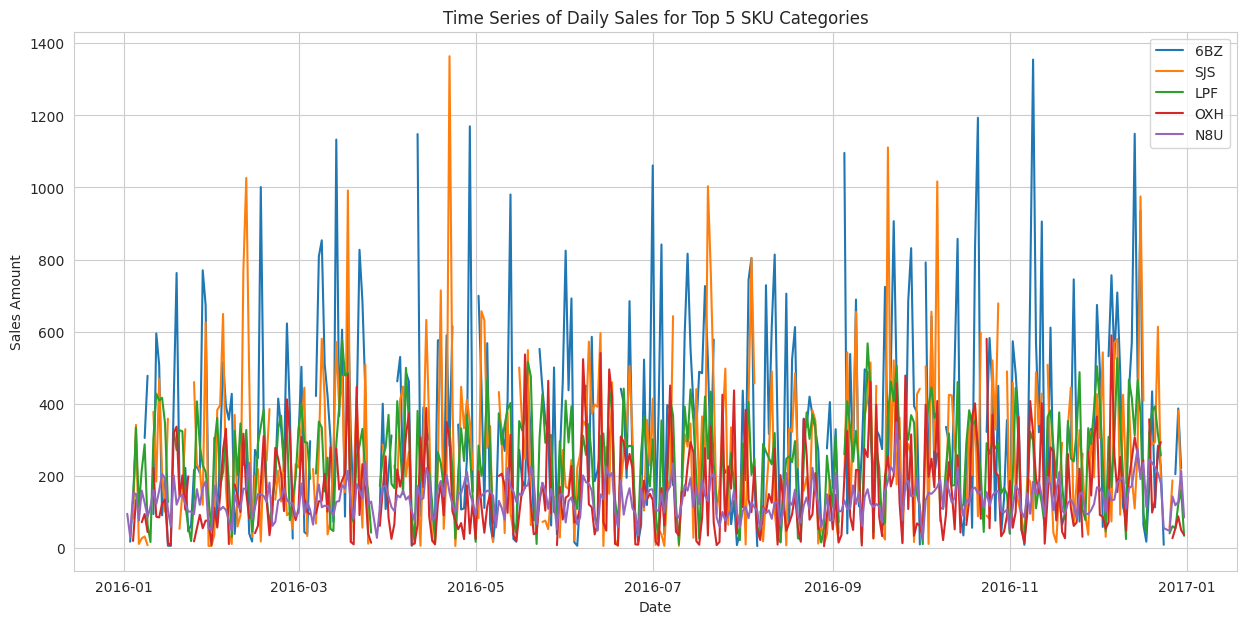

In [29]:
# Aggregating sales amount by date and SKU_Category
category_sales_daily = data.pivot_table(values='Sales_Amount', index=data.index, columns='SKU_Category', aggfunc='sum')

# Selecting the top few categories based on total sales
top_categories = total_sales_per_category.sort_values(ascending=False).head(5).index

# Filtering the data to include only the top categories
top_category_sales_daily = category_sales_daily[top_categories]

# Plotting time series for each of the top categories
plt.figure(figsize=(15, 7))
for category in top_categories:
    plt.plot(top_category_sales_daily[category], label=category)

# Title and labels
plt.title('Time Series of Daily Sales for Top 5 SKU Categories')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()


In [30]:
# Sorting the total sales per SKU category in descending order
sorted_total_sales_per_category = total_sales_per_category.sort_values(ascending=False)

# Display the top 10 categories with the highest sales
top_categories_with_highest_sales = sorted_total_sales_per_category.head(10)
top_categories_with_highest_sales


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SKU_Category
6BZ    114061.33
SJS     85142.31
LPF     84921.91
OXH     54470.16
N8U     49119.55
9ZX     42629.31
01F     38029.87
IEV     37618.22
8HU     35528.14
R6E     34784.59
Name: Sales_Amount, dtype: float64

In [31]:
 # Calculating the number of transactions for each SKU
transactions_per_sku = data.groupby('SKU')['Transaction_ID'].nunique()
# Sorting these by the number of transactions
sorted_transactions_per_sku = transactions_per_sku.sort_values(ascending=False)
# Display the top 10 SKUs with the most transactions
top_skus_with_most_transactions = sorted_transactions_per_sku.head(10)

top_skus_with_most_transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SKU
UNJKW    2007
COWU2     791
OV1P9     737
M6J9W     698
C6TXL     689
CZUZX     621
W1ZMG     600
TL4WZ     600
QGK3S     593
DWJC4     587
Name: Transaction_ID, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


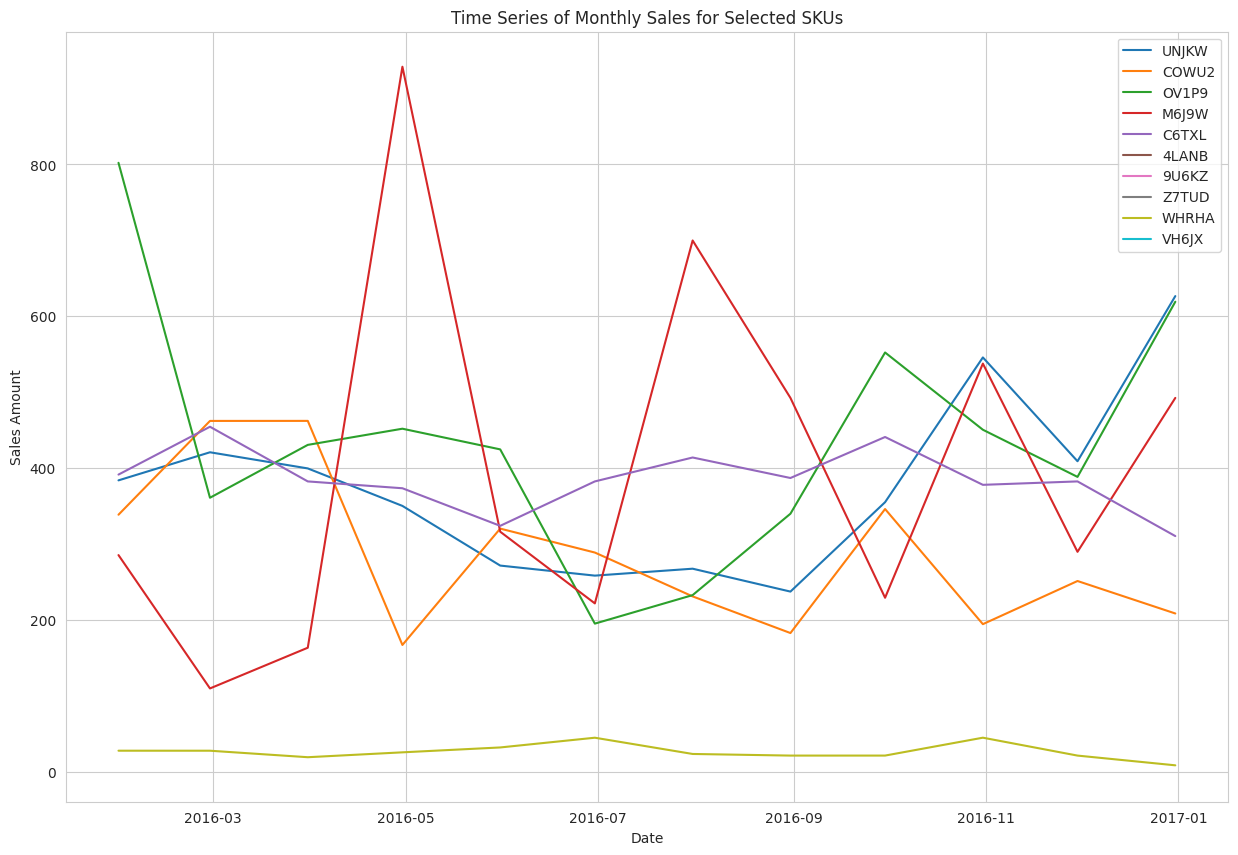

In [32]:
# Selecting popular SKUs and random SKUs
popular_skus = top_skus_with_most_transactions.index[:5]
random_skus = np.random.choice(data['SKU'].unique(), 5, replace=False)
selected_skus = np.concatenate([popular_skus, random_skus])

# Filtering the data to include only the selected SKUs and resampling by month
selected_sku_sales_monthly = data[data['SKU'].isin(selected_skus)] \
    .groupby(['SKU', pd.Grouper(freq='M')])['Sales_Amount'].sum().unstack('SKU')

# Plotting time series for each of the selected SKUs
plt.figure(figsize=(15, 10))
for sku in selected_skus:
    plt.plot(selected_sku_sales_monthly[sku], label=sku)

# Title and labels
plt.title('Time Series of Monthly Sales for Selected SKUs')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()